## KNN DataSet - Classified Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df_classified = pd.read_csv('../Datasets/Classified Data',index_col=0)

In [32]:
df_classified.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### *As we can see here the columns names are just random values so this is very common thing in data science interviews. This is anonymus classified data.*

### The KNN predicts the class target variable which are closer to the class and hence scale of the variables are very important and any variable which is on larger scale will have much larger effect on the distance b/w observation and because of this when you are using KNN, it is advisable to use the standardized scale. 

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scalar = StandardScaler()

In [35]:
scalar.fit(df_classified.drop('TARGET CLASS',axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
scaledFeatured = scalar.transform(df_classified.drop('TARGET CLASS',axis=1))

In [37]:
df = pd.DataFrame(scaledFeatured,columns = df_classified.columns[:-1])

In [38]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


### Using KNN to predict the target

In [40]:
X = df

In [41]:
y = df_classified['TARGET CLASS']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [50]:
pred = knn.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [55]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       189
           1       0.94      0.93      0.94       211

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400



### The most important step in k-Nearest Neigborhood supervised machine learning is to determine the optimal value of K; that is, how many clusters your data should be divided into? The optimal value of k reduces effect of the noise on the classification, but makes boundaries between classes less distinc. *Elbow method* helps data scientists to select the optimal number of clusters for KNN clustering. It is one of the most popular methods to determine this optimal value of K. 

## Elbow Method

In [57]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

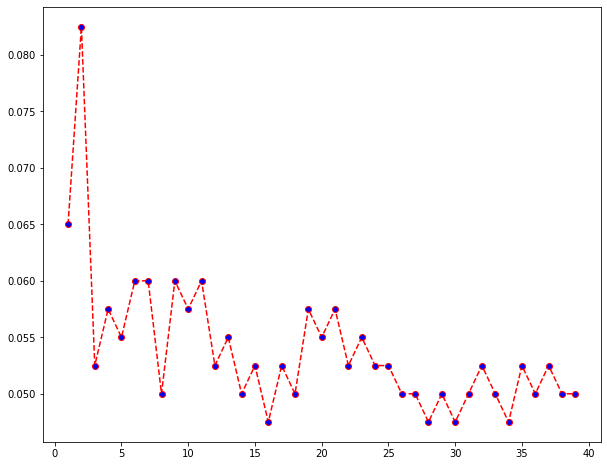

In [65]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color = 'red',ls='--',marker='o',markerfacecolor = 'blue')

### *We can clarily see the lowest values of k through the plot* and we can train the model as per the correct value of K and can get the highest accuracy

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
knn = KNeighborsClassifier(n_neighbors=16)

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [70]:
pred = knn.predict(X_test)

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       191
           1       0.96      0.95      0.95       209

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [74]:
print(confusion_matrix(y_test,pred))

[[182   9]
 [ 10 199]]
